In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import sin_cos, generate_data, lstm_model, read_data

In [2]:
LOG_DIR = './ops_logs/sin_cos'
TIMESTEPS = 5
RNN_LAYERS = [{'num_units': 5}, {'num_units': 2}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [3]:
regressor = learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),
                            model_dir=LOG_DIR)

In [12]:
X, y = generate_data(sin_cos, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
#X, y  = read_data('TATAMOTORS', 'Close', TIMESTEPS, seperate=False)

# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], 
              monitors=[validation_monitor], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

prediction: Tensor("linear_regression/mean_squared_error_regressor/xw_plus_b:0", shape=(?, 2), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/xw_plus_b:0", shape=(?, 2), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/xw_plus_b:0", shape=(?, 2), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/xw_plus_b:0", shape=(?, 2), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/xw_plus_b:0", shape=(?, 2), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/xw_plus_b:0", shape=(?, 2), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/xw_plus_b:0", shape=(?, 2), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/xw_plus_b:0", shape=(?, 2), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


Estimator(params=None)

In [5]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

prediction: Tensor("linear_regression/mean_squared_error_regressor/xw_plus_b:0", shape=(?, 2), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)
MSE: 0.000035


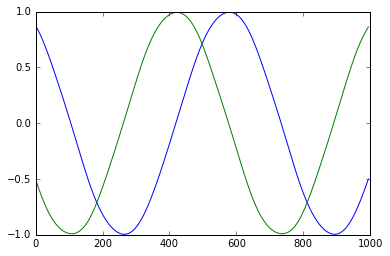

In [6]:
plt.plot(predicted)

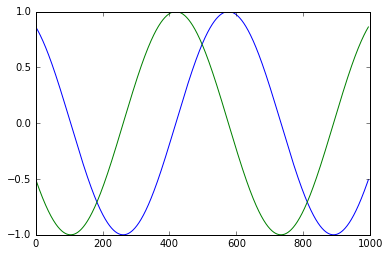

In [8]:
plt.plot(y['test'])

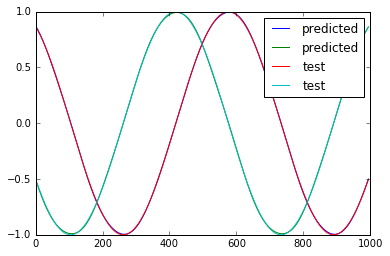

In [9]:
plot_predicted = plt.plot(predicted, label='predicted')
plot_test = plt.plot(y['test'], label='test')
plt.legend(handles=plot_predicted+plot_test)

In [9]:
X

{'test': array([[[ 51.6518],
         [ 51.0529],
         [ 51.502 ],
         [ 52.1009],
         [ 53.2986]],
 
        [[ 51.0529],
         [ 51.502 ],
         [ 52.1009],
         [ 53.2986],
         [ 55.0952]],
 
        [[ 51.502 ],
         [ 52.1009],
         [ 53.2986],
         [ 55.0952],
         [ 55.2449]],
 
        ..., 
        [[ 19.7624],
         [ 20.0618],
         [ 20.3613],
         [ 20.9601],
         [ 20.511 ]],
 
        [[ 20.0618],
         [ 20.3613],
         [ 20.9601],
         [ 20.511 ],
         [ 21.1098]],
 
        [[ 20.3613],
         [ 20.9601],
         [ 20.511 ],
         [ 21.1098],
         [ 21.8584]]]), 'train': array([[[ 511.95  ],
         [ 510.25  ],
         [ 506.9   ],
         [ 515.25  ],
         [ 515.25  ]],
 
        [[ 510.25  ],
         [ 506.9   ],
         [ 515.25  ],
         [ 515.25  ],
         [ 502.3   ]],
 
        [[ 506.9   ],
         [ 515.25  ],
         [ 515.25  ],
         [ 502.3   ],
        

In [10]:
X, y = generate_data(sin_cos, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)

In [11]:
X

{'test': array([[[ 0.88992744, -0.45610213],
         [ 0.88532153, -0.46497934],
         [ 0.88062708, -0.47381004],
         [ 0.87584454, -0.48259335],
         [ 0.87097441, -0.49132839]],
 
        [[ 0.88532153, -0.46497934],
         [ 0.88062708, -0.47381004],
         [ 0.87584454, -0.48259335],
         [ 0.87097441, -0.49132839],
         [ 0.86601715, -0.50001429]],
 
        [[ 0.88062708, -0.47381004],
         [ 0.87584454, -0.48259335],
         [ 0.87097441, -0.49132839],
         [ 0.86601715, -0.50001429],
         [ 0.86097329, -0.50865018]],
 
        ..., 
        [[-0.56544436,  0.82478644],
         [-0.55716753,  0.83040011],
         [-0.54883498,  0.83593072],
         [-0.54044753,  0.84137772],
         [-0.53200602,  0.84674057]],
 
        [[-0.55716753,  0.83040011],
         [-0.54883498,  0.83593072],
         [-0.54044753,  0.84137772],
         [-0.53200602,  0.84674057],
         [-0.5235113 ,  0.85201873]],
 
        [[-0.54883498,  0.83593072],
 